## Machine Learning - Ex.3


Submitted by: [enter your name/s]

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Part I - Linear classifier

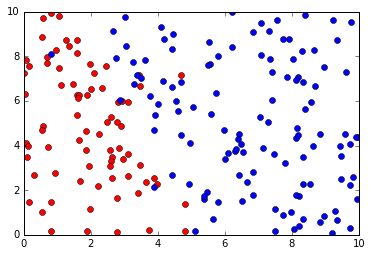

In [2]:
# generate the training data:

N = 200

x = np.random.random((N,2))*10

X = np.concatenate((np.ones((N,1)),x),axis=1);
w = np.array([-16,3,1])
z = np.dot(X,w)
h = 1/(1+np.exp(-z))
r = np.random.rand(N)
y = np.zeros(N)
y[r<h] = 1



plt.plot(x[y==0,0],x[y==0,1],'or')
plt.plot(x[y==1,0],x[y==1,1],'ob')
plt.show()



Implement a gradient descent algorithm to solve the logistic regression problem:


Next, use your algorithm to learn a linear classifier for the given data,

$$  y(x;w) =  \begin{cases}
        1, & g(w^\top x)\geq 0.5\\
       0, & g(w^\top x) < 0.5\\
        \end{cases} 
        $$
        
where, $w^\top x=w_0+w_1 x_1 + w_2 x_2$
        
and, $g(\cdot)$ is a sigmoid function:

$$ g(z)=\frac{1}{1+e^{-z}} $$

- Plot the original data points and mark (e.g., with yellow circles) any misclassified point.
- Draw the linear decision boundary ($w^\top x=0$).
- Try to plot the a colormap of the 2-D function $g(w^\top x)$ on the same plot.

[-13.15606074   2.58870122   0.78707589]


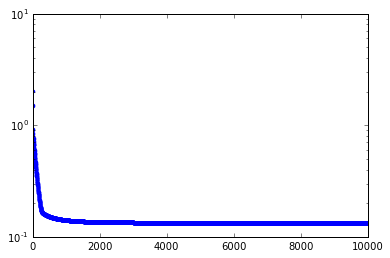

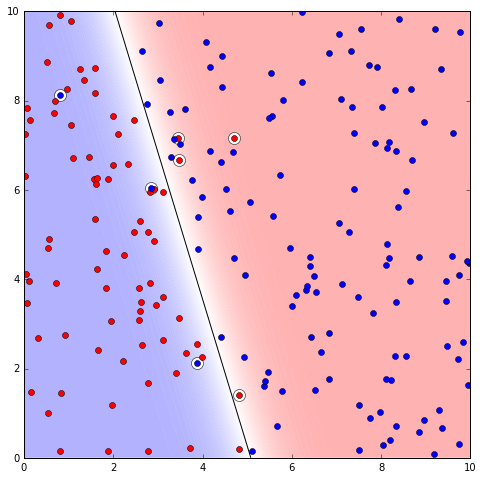

In [3]:
def gradient_descent (X, y, alpha=0.3, T=10000):
    J = np.zeros(T) 
    N,d = X.shape
    w = np.zeros(d)    
    for t in range(T):
        z = X.dot(w)
        g = 1 / (1+np.exp(-z))
        w = w - (alpha*2/N) * (np.dot(X.T,g-y))
        J[t] = -np.mean(y*np.log(g) + (1-y)*np.log(1-g))
    return w, J

w,J = gradient_descent(X,y)
plt.plot(J,'.-')
plt.yscale('log')
print(w)


# visualization
N = 100
x1_set = np.linspace(0,10,N)
x2_set = np.linspace(0,10,N)

G_grid = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        x1,x2 = x1_set[i],x2_set[j]
        z = np.dot([1,x1,x2],w)
        G_grid[j,i] = 1/(1+np.exp(z))

### alternative way to create G_grid:
X1,X2 = np.meshgrid(x1_set,x2_set)
Z = w[0] + w[1]*X1 + w[2]*X2
G_grid = 1/(1+np.exp(-Z))
###
        
        
plt.figure(figsize=(8,8))
plt.contourf(x1_set,x2_set,G_grid, 100,alpha=0.3, cmap=plt.cm.bwr,antialiased=True,vmin=0,vmax=1)
plt.contour(x1_set,x2_set,G_grid, levels=[0.5], colors='black', linewidth=5)

yhat = 1 / (1+np.exp(-X.dot(w))) >= 0.5
misses = yhat!=y

plt.plot(x[misses,0],x[misses,1],'ow',markersize=12)
plt.plot(x[y==0,0],x[y==0,1],'or')
plt.plot(x[y==1,0],x[y==1,1],'ob')
plt.show()




### Part II - Non-linear classifier

In this part you are given sample points in 2-D, which are not linearly seperable. 

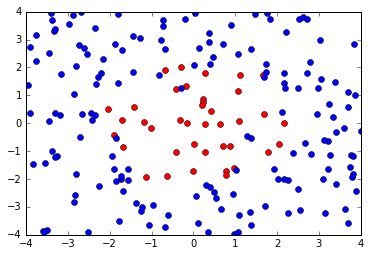

In [4]:
N= 200

x = np.random.random((N,2))*8-4

X = np.concatenate((np.ones((N,1)),x,x**2),axis=1);
w = np.array([-4,0,0,1,1])
z = np.dot(X,w)
h = 1/(1+np.exp(-z))
r = np.random.rand(N)
y = np.zeros(N)
y[r<h] = 1



plt.plot(x[y==0,0],x[y==0,1],'or')
plt.plot(x[y==1,0],x[y==1,1],'ob')
plt.show()



Use the same algoirthm from part I, to find a non-linear classifier:

$$  y(x;w) =  \begin{cases}
        1, & g(w^\top x)\geq 0.5\\
       0, & g(w^\top x) < 0.5\\
        \end{cases} 
        $$
        
where, $w^\top x=w_0+w_1 x_1 + w_2 x_2 + w_3 {x_1}^2 + w_4 {x_2}^2$
        
and, $g(\cdot)$ is a sigmoid function:

$$ g(z)=\frac{1}{1+e^{-z}} $$

- Plot the original data points and mark (e.g., with yellow circles) any misclassified point.
- Draw the linear decision boundary ($w^\top x=0$).
- Try to plot the a colormap of the 2-D function $g(w^\top x)$ on the same plot.

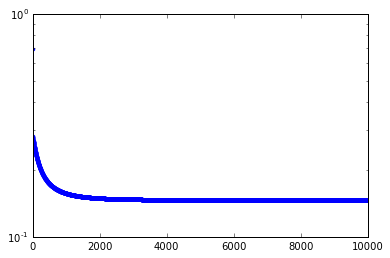

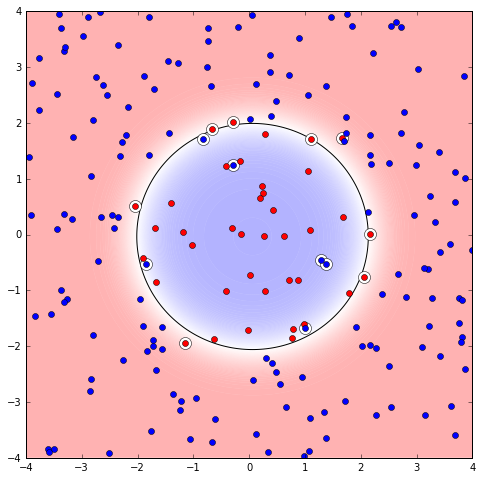

In [5]:

w,J = gradient_descent(X,y,alpha=0.05,T=10000)
plt.plot(J,'.-')
plt.yscale('log')
plt.show()


# visualization
x1_set = np.linspace(-4,4,N)
x2_set = np.linspace(-4,4,N)

G_grid = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        x1,x2 = x1_set[i],x2_set[j]
        z = np.dot([1,x1,x2,x1**2,x2**2],w)
        G_grid[j,i] = 1/(1+np.exp(z))

### alternative way to create G_grid:
X1,X2 = np.meshgrid(x1_set,x2_set)
Z = w[0] + w[1]*X1 + w[2]*X2 + w[3]*(X1**2) + w[4]*(X2**2)
G_grid = 1/(1+np.exp(-Z))
###
        
        
plt.figure(figsize=(8,8))
plt.contourf(x1_set,x2_set,G_grid, 100,alpha=0.3, cmap=plt.cm.bwr,antialiased=True,vmin=0,vmax=1)
plt.contour(x1_set,x2_set,G_grid, levels=[0.5], colors='black', linewidth=5)

yhat = 1 / (1+np.exp(-X.dot(w))) >= 0.5
misses = yhat!=y

plt.plot(x[misses,0],x[misses,1],'ow',markersize=12)
plt.plot(x[y==0,0],x[y==0,1],'or')
plt.plot(x[y==1,0],x[y==1,1],'ob')
plt.show()


## Good luck !